In [19]:
import time
import json
import scipy
import pickle
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [36]:
df = pd.read_pickle('../data/shippify_icd.pkl', compression='gzip')
df = df.dropna(subset=['pickup_effective_dt', 'delivery_effective'])

### **Agregar codigo necesario debajo de su nombre**

## Enmanuel Magallanes

In [106]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = a[i] + a[i+8]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*8 + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            plt.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
## Question: cual son las franjas horarias en las que se regitran mas tareas atrasadas y de que (tipo|peso) son?
## Question: Are the heaviest tasks the ones that register the most delays at the time of delivery?

In [37]:
def sum_total_weight(row):
  items = json.loads(row)
  total_weight = 0
  for item in items:
    try:
      total_weight += float(item['weight'])     
    except:
      total_weight += 0
  return total_weight

df['total_weight'] = df['items'].apply(sum_total_weight).astype('float32')

In [39]:
# Remove outlayers
z_scores = stats.zscore(df['total_weight'])
abs_z_scores = np.abs(z_scores)
filtered_entries = abs_z_scores < 3
df = df[ filtered_entries ]

<AxesSubplot:xlabel='total_weight', ylabel='Density'>

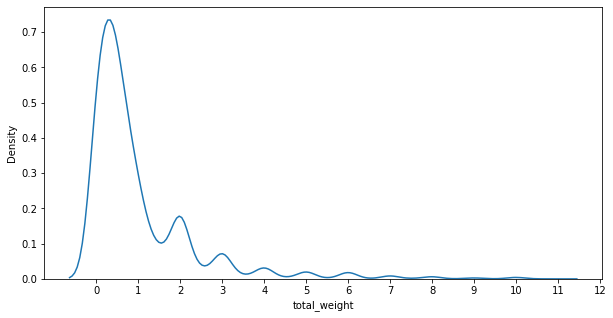

In [53]:
plt.figure(figsize=(10,5))
plt.xticks([x for x in range(16)])
sns.kdeplot(data=df, x='total_weight', bw_adjust=2)

<AxesSubplot:xlabel='total_weight'>

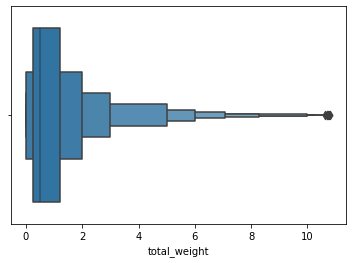

In [55]:
## Boxplot of total_weight
sns.boxenplot(data=df, x='total_weight')

In [56]:
labels = ['[0,0.5) kg', '[0.5,1) kg', '[1,1.5) kg', '[1.5,2) kg', '[2,2.5) kg', '[2.5,3) kg', '[3,3.5) kg', '[3.5 kg,inf) kg']
df['class_weight'] = pd.cut(df['total_weight'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, np.inf], labels=labels, include_lowest=True)

In [57]:
df['class_weight'].value_counts()

[0,0.5) kg         176206
[0.5,1) kg          74690
[1.5,2) kg          35297
[1,1.5) kg          20836
[3.5 kg,inf) kg     18486
[2.5,3) kg          13897
[2,2.5) kg           6549
[3,3.5) kg           2082
Name: class_weight, dtype: int64

In [59]:
df.columns

Index(['id', 'route_id', 'creation_date', 'delivery_type', 'city', 'cost',
       'total_size', 'distance', 'company_id', 'network_id',
       'vehicle_capacity', 'pickup_dt', 'pickup_effective_dt', 'pickuplat',
       'pickuplng', 'pickup_location', 'delivery', 'delivery_effective', 'lat',
       'long', 'delivery_location', 'items', 'total_weight', 'class_weight'],
      dtype='object')

In [62]:
df['is_late'] = df['delivery'] < df['delivery_effective']

In [70]:
gwl = df[['id', 'class_weight', 'is_late']].groupby(['class_weight', 'is_late'])['id'].count().reset_index()
gwl

,class_weight,is_late,id
0,"[0,0.5) kg",False,104349
1,"[0,0.5) kg",True,71857
2,"[0.5,1) kg",False,51030
3,"[0.5,1) kg",True,23660
4,"[1,1.5) kg",False,14476
5,"[1,1.5) kg",True,6360
6,"[1.5,2) kg",False,23754
7,"[1.5,2) kg",True,11543
8,"[2,2.5) kg",False,4549
9,"[2,2.5) kg",True,2000


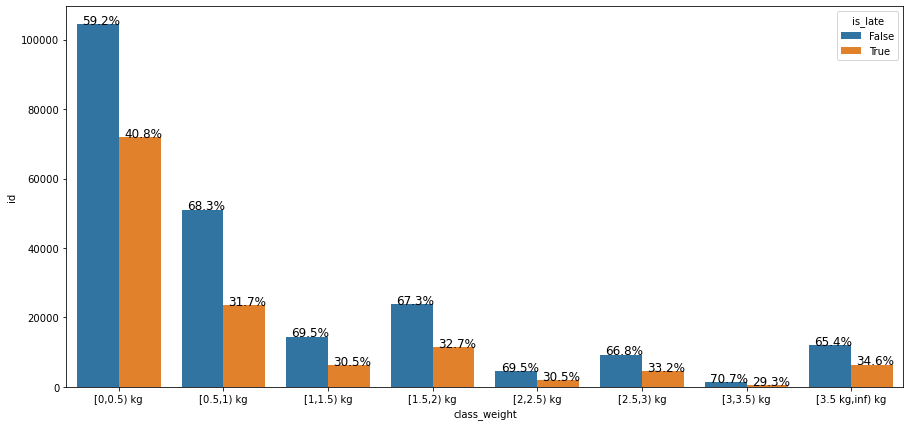

In [110]:
plt.figure(figsize=(15,7))
f = sns.barplot(data=gwl, x='class_weight', y='id', hue='is_late')
with_hue(f, df.class_weight, 8, 2)

A primera vista, el porcentaje de paquetes con retraso no es directamente ni directamente proporcioanl al peso. Por lo que el peso total de la entrega no afecta en la puntualidad de la entrega

### Hour late vs Total weight

In [137]:
diff = df['delivery'] - df['delivery_effective']
df['delay_delivery'] = diff.apply(lambda x: abs(int(x.total_seconds()))) / 3600

## Josue Cobos

In [ ]:
## Question: cual son las franjas horarias en las que se regitran mas tareas atrasadas y de que (tipo|peso) son?